# Assignment: Linear Regression

## Introduction

In this assignment we work on the linear regression of data with one variable. The data we use for this is the profit of a transporter related to the size of a city where that transporter works. You can imagine that it is useful to know this ratio, because on this basis you can make an informed decision whether you want to open a new branch in a new city (with a certain size). The data is given in the file `data.pkl`.

## 1. Load the data
To be able to carry out the exercises, we first load the necessary files and set some variables. Run the cell below.

In [32]:
#dependencies
import numpy as np
import pickle
import matplotlib.pyplot as plt

#load the data
with open('data/vervoerder.pkl','rb') as f:
    data=pickle.load(f) 

#define the number of observations (m) and the number of features (n)
m,n = data.shape

#define matrix X, vector y and the initial values of theta (which are zeros)
X = np.c_[np.ones(m), data[:, [0]]]
y = data[:, [1]]
theta = np.zeros( (1, 2) )

#pyplot inline 
%matplotlib inline

In [33]:
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

## 2. Inspect the data

The second step in any machine-learning project is to inspect the data. We can do that by creating an image of the data. The easiest way to do this in this case is to use a scatter plot.

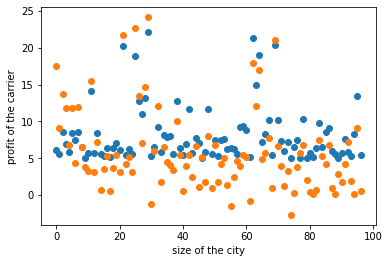

In [34]:
def drawGraph(data):
    """
    Make a scatter plot of the data with the size of the cities on the x-axis, 
    the profit of the carrier on the y-axis.
    Don't forget to label the axes of the graph (ylabel, xlabel)
    """
    #YOUR CODE HERE
    plt.plot(data, 'o')
    plt.xlabel('size of the city')
    plt.ylabel('profit of the carrier')
    plt.show()
    pass

drawGraph(data)

## 3. Model (<em>cost function</em>)

As discussed in the theoretical part, the goal is to minimize the cost function. You minimize this by using <em> gradient descent </em>. It is often useful to keep track of that cost function during the iterations, so that you can plot the different results through your data - for example, you can check whether you have not entered a local minimum. In this assignment we program the cost function further; the following exercise discusses the <em> gradient descent </em>. We ask you specifically to program the cost function yourself instead of using a sklearn module in order to fully understand the principle of the linear regression. 

The cost function is given by the following equation:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2$$

In which $J(\theta)$ is the total cost calculated by the current values of $\theta$; $h_\theta(x)$ is the hypothesed value of the values (the prediction) and $y$ is the actual value. By adding up and eventually averaging the difference between these two values for each data point, we arrive at the predictive value that the formula has with the current values of $\theta$.


For the hypothesis we can use a vectorized implementation. 

$$ h_\theta(x) = \theta^T.X = \theta_0 + \theta_1x $$

<p>Since we are looking for a line, we are actually dealing with one parameter (after all, a line is $ y = b + ax $). To make the dimensionality of the training data correspond to $ \ theta $, we have to add a column of ones.</p>

The predicted values in $ X $, the current values in $ y $ and a theta are given below to the method `computeCost`; this function must return the value of $ J (\ theta) $. Implement this function; see also the directions in the cell below. Make it work for any size of theta (a vectorial implementation).

You should end up with a value of around 32.07.

In [35]:

def computeCost(X, y, theta):
    """
    This method calculates the cost of the current values of theta, that is, the extent to which the
    prediction (given the specific value of theta) corresponds to the actual value (that
    is given in y).

    Every data point in X is multiplied by theta (which dimensions have X and thus theta transposed)
    and the result of this is compared with the actual value (so with y). The difference between
    these two values are squared and the total of all these squares is divided by it
    number of data points to get the average. You must return this average (the variable
    J: a number, in short).

    A pseudo algorithm could be the following:

    1.Determine the number of data points
    2.Determine the prediction 
    3.Calculate the difference between this prediction and the actual value
    4.square this difference
    5.Add all these squares together and divide by twice the number of data points
    """

    J = 0
    # 1.Determine the number of data points
    m = len(X)
    # 2.Determine the prediction 
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    print(X * theta.T)
    print(y)
    # 3.Calculate the difference between this prediction and the actual value
    
    return J

J = computeCost(X, y, theta)
print ("calculated J is {:.4f}.".format(J))
print ("This should be around 32.07")

[[-3.89578088  7.28955487]
 [-3.89578088  6.59473207]
 [-3.89578088 10.1629764 ]
 [-3.89578088  8.35505322]
 [-3.89578088  6.99093855]
 [-3.89578088 10.00108174]
 [-3.89578088  8.91959674]
 [-3.89578088 10.2339619 ]
 [-3.89578088  7.73825482]
 [-3.89578088  6.03030786]
 [-3.89578088  6.81305723]
 [-3.89578088 16.89812854]
 [-3.89578088  6.84085492]
 [-3.89578088 10.03150409]
 [-3.89578088  6.72954488]
 [-3.89578088  6.41780519]
 [-3.89578088  7.59413636]
 [-3.89578088  6.1203819 ]
 [-3.89578088  7.67072912]
 [-3.89578088  8.43570229]
 [-3.89578088  7.38380453]
 [-3.89578088 24.18279197]
 [-3.89578088  6.54987401]
 [-3.89578088  7.54725014]
 [-3.89578088  6.63911293]
 [-3.89578088 22.60202239]
 [-3.89578088 15.30423559]
 [-3.89578088 13.07206964]
 [-3.89578088 15.7194113 ]
 [-3.89578088 26.488926  ]
 [-3.89578088  6.26628991]
 [-3.89578088  7.8613759 ]
 [-3.89578088 11.03341375]
 [-3.89578088  7.02911562]
 [-3.89578088  9.79611856]
 [-3.89578088  9.46481311]
 [-3.89578088  9.65868108]
 

## 3. Model (Gradient descent)

Finally, you create the method `gradientDescent`. In this method a number of steps are performed, in each step the vector $ \ theta $ is adjusted according to the formula below.

$$ \theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j $$

$ \ Alpha $ is the learning speed (* learning rate *).
If all goes well, every step in this method will cause $ J (\ theta) $ to drop. Note that you edit all $ \ theta_j $ at the same time (in this case the size of $ \ theta is $ 2, so every iteration two parameters need to be adjusted). Also, make sure you <em> only </em> change the $ \ theta $: X and y are constant values that don't need to be changed.

In this method, you also need to keep a list that tracks the cost of that specific iteration (the values of J). We use this list in the cell below to actually show the * gradual descent *. Make sure that the method `gradientDescent` returns two things: the final values of theta and the list of costs through the descent.

In [1]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    In this problem, every parameter of theta num_iter is updated times the optimal values
    for these parameters. Per iteration you have to update all parameters of theta.

    Each parameter of theta is reduced by the sum of the error of all data points
    multiplied by the data point itself (see Blackboard for the corresponding formula).
    This sum itself is multiplied by the 'learning rate' alpha.

    A possible step-by-step plan would be:
    
    For every iteration from 1 to num_iters:
        1. Determine the prediction for the data point, given the current value of theta
        2. Determine the difference between this forecast and the true value
        3. Multiply this difference by the ith value of X.
        4. Update the ith parameter of theta, namely by decreasing it by
        5. alpha times the mean of the sum of the multiplication from 3
    """
    m,n = X.shape
    costs = [] 
    for _ in range(num_iters):
        #YOUR CODE HERE
        pass

    return theta[0], costs

alpha = 0.01
num_iters = 1500
theta = np.zeros( (1,2) )
theta, costs = gradientDescent(X, y, theta, alpha, num_iters) 
print ("Values theta={}".format(theta))
print ("This should be around (-3.63, 1.16)");

NameError: name 'np' is not defined

## 4. Evaluate

Now we plot the cost against iterations

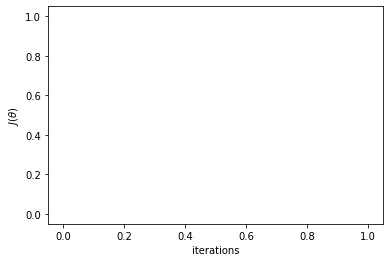

In [5]:
def drawCosts(data): 
    y = np.arange(len(data))
    plt.plot(data,y)
    plt.ylabel(r'$J(\theta)$')
    plt.xlabel('iterations')
    plt.show()
    
drawCosts(costs)